In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
penguins_df = sns.load_dataset('penguins').dropna()
penguins_df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [17]:
penguins_df.species.value_counts()

,count
species,
Adelie,146
Gentoo,119
Chinstrap,68


In [18]:
penguins_df.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


In [19]:
penguins_df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [20]:
penguins_df.loc[:,'species'] = penguins_df['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})
penguins_df.loc[:,'sex'] = penguins_df['sex'].map({'Male':0,'Female':1})

In [21]:
penguins_df['species'] = penguins_df['species'].astype(int)

In [22]:
penguins_df['sex'] = penguins_df['sex'].astype(int)

In [9]:
penguins_df.dtypes

,0
species,int64
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,int64


In [23]:
X = penguins_df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]  # Seleccionar características
y = penguins_df['species']

# ENTRENAMIENTO DE MODELO VECINOS CERCANOS(KNN)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)

report = classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        13

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67





```
# Esto tiene formato de código
```

**Precisión (Precision)**: Proporción de predicciones correctas de una clase entre todas las predicciones realizadas para esa clase.




**Exhaustividad (Recall)**: Proporción de instancias correctamente clasificadas en una clase entre todas las instancias reales de esa clase.

**F1-score**: Media armónica entre precisión y exhaustividad, útil cuando hay un balance desigual entre clases.

**Soporte (Support)**: Número total de ejemplos de cada clase en los datos de prueba.

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


# VERIFICAMOS SI HAY SOBREAJUSTE CON VALIDACIÓN CRUZADA

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation accuracy: {scores.mean():.2f}')

Cross-validation scores: [0.7037037  0.8490566  0.69811321 0.73584906 0.73584906]
Mean cross-validation accuracy: 0.74


# Analizar el sobreajuste con diferentes valores de k

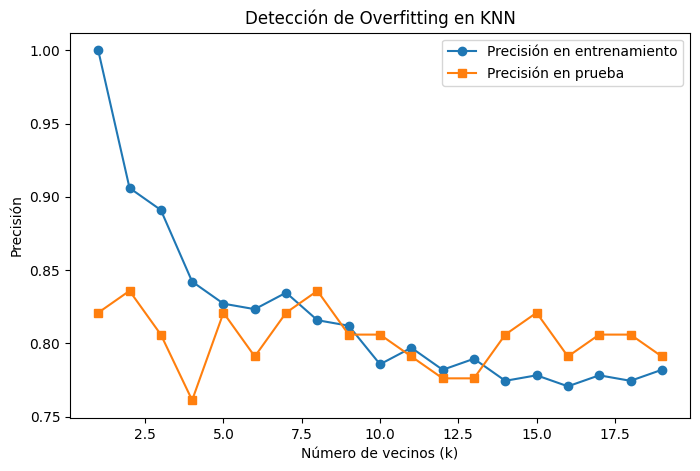

In [ ]:
neighbors = np.arange(1, 20)
train_accuracy = []
test_accuracy = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# Graficar la precisión en entrenamiento y prueba
plt.figure(figsize=(8, 5))
plt.plot(neighbors, train_accuracy, label='Precisión en entrenamiento', marker='o')
plt.plot(neighbors, test_accuracy, label='Precisión en prueba', marker='s')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión')
plt.title('Detección de Overfitting en KNN')
plt.legend()
plt.show()
